Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from collections import Counter

Reading Dataset

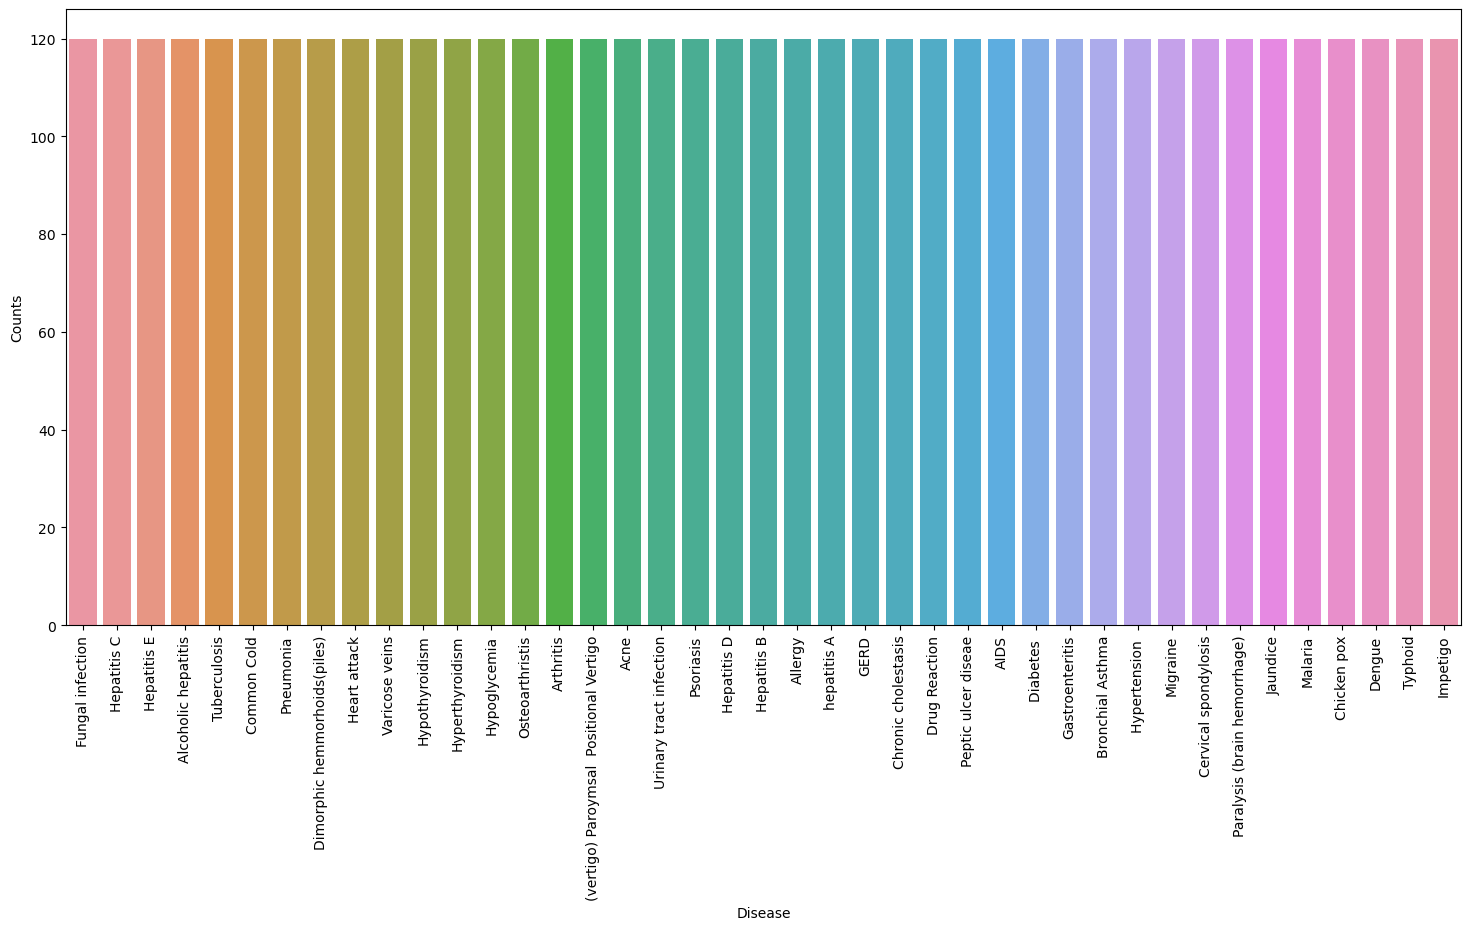

In [5]:
data = pd.read_csv('Training.csv').dropna(axis = 1)

disease_counts = data['prognosis'].value_counts()

temp_df = pd.DataFrame({
    "Disease":disease_counts.index,
    "Counts":disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x="Disease",y="Counts",data =  temp_df)
plt.xticks(rotation=90)
plt.show()

Encoding the data

In [6]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 24)

print(f'Train: {x_train.shape},  {y_train.shape}')
print(f'Test: {x_test.shape},  {y_test.shape}')

Train: (3936, 132),  (3936,)
Test: (984, 132),  (984,)


Evaluating the performance of different models using cross-validation

In [9]:
def cv_scoring(estimator,X,y):
    return(accuracy_score(y,estimator.predict(X)))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state= 18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model,X,y,cv = 10,n_jobs = -1,scoring = cv_scoring)
    
    print('=='*25)
    print(model_name)
    print(f'Scores: {scores}')
    print(f'Mean Score: {np.mean(scores)}')

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier:100.0%
Accuracy on test data by SVM Classifier: 100.0%


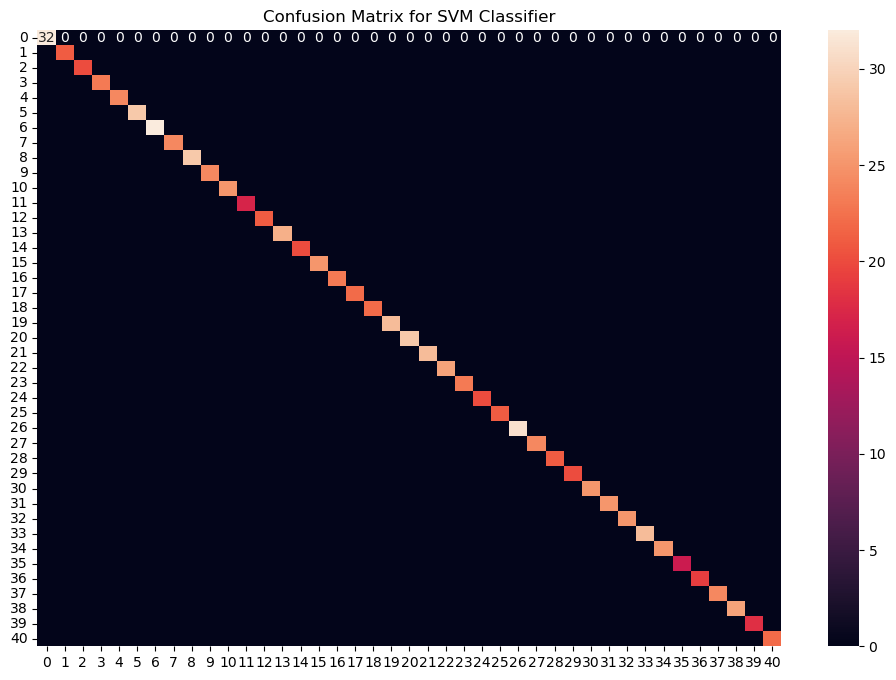

Accuracy on train data by Naive Bayes Classifier: 100.0%
Accuracy on test data by Naive Bayes Classifier: 100.0%


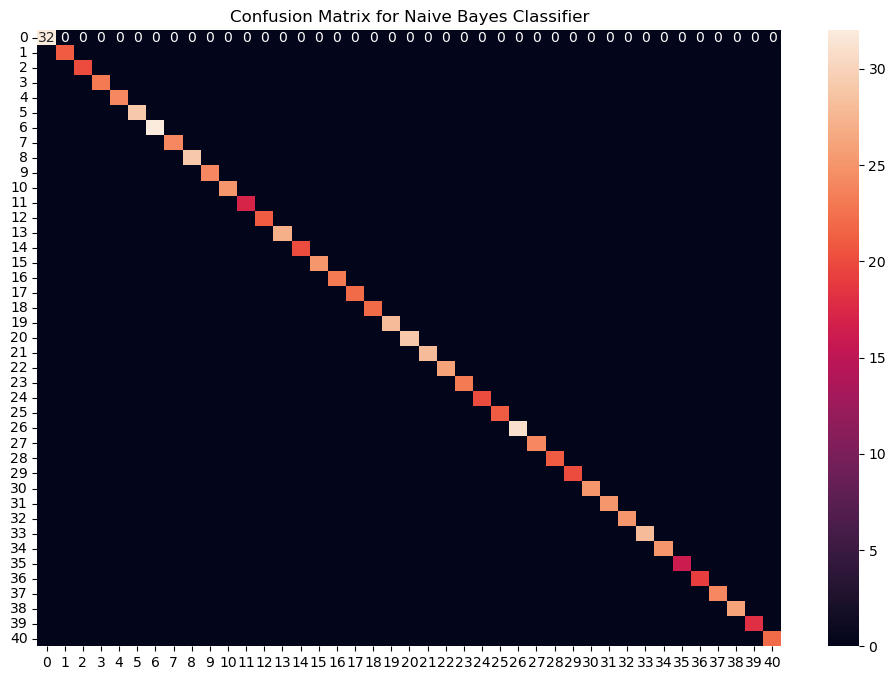

Accuracy on train data by Random Forest Classifier: 100.0%
Accuracy on test data by Random Forest Classifier: 100.0%


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

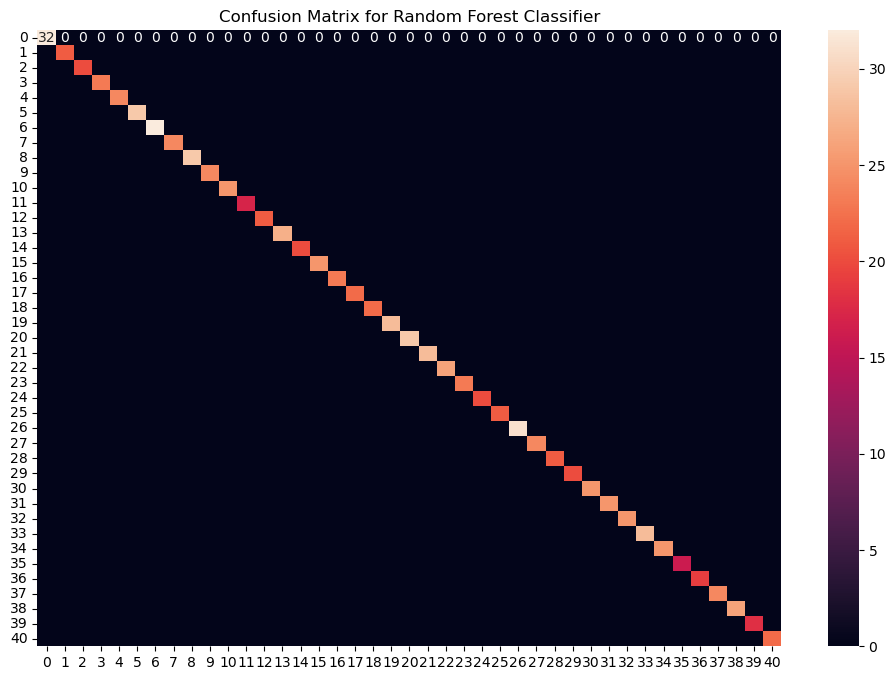

In [12]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
preds = svm_model.predict(x_test)
print(f"Accuracy on train data by SVM Classifier:{accuracy_score(y_train, svm_model.predict(x_train))*100}%") 
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}%") 

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix,annot=True,fmt = 'd')
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
preds = nb_model.predict(x_test)
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train,nb_model.predict(x_train))*100}%")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_train,nb_model.predict(x_train))*100}%")

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot = True)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
preds = rf_model.predict(x_test)
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train,rf_model.predict(x_train))*100}%")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_train,rf_model.predict(x_train))*100}%")

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot = True)
plt.title("Confusion Matrix for Random Forest Classifier")

In [32]:
symptoms = X.columns.values 
  
symptom_index = {} 
for index, value in enumerate(symptoms): 
    symptom = " ".join([i.capitalize() for i in value.split("_")]) 
    symptom_index[symptom] = index 

data_dict = { 
    "symptom_index":symptom_index, 
    "prediction_classes":encoder.classes_ 
} 

def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    input_data = [0] * len(data_dict["symptom_index"])
    
    for symptom in symptoms:
        symptom = symptom.strip().capitalize()
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)
    

    rf_prediction = rf_model.predict(input_data)[0]
    nb_prediction = nb_model.predict(input_data)[0]
    svm_prediction = svm_model.predict(input_data)[0]

    
    rf_prediction = data_dict["prediction_classes"][rf_prediction]
    nb_prediction = data_dict["prediction_classes"][nb_prediction]
    svm_prediction = data_dict["prediction_classes"][svm_prediction]

    predictions_list = [rf_prediction, nb_prediction, svm_prediction]
    final_prediction = Counter(predictions_list).most_common(1)[0][0]
    
    
    return final_prediction


print(predictDisease("anxiety,acidity"))

GERD


C:\Users\devan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\devan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\devan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
